# Lesson 10: Visualization Final Project

This is a beginner tutorial about **applying dim redux to images** by converting them to numerical values.  

As we know, images are understood as matrices of numbers by computers.  
This means we can apply our dim redux techniques learned up until this point. 

We will use images that represent numbers.  

This dataset comes from a pre-loaded packages in sklearn called 'load_digits'.


# Imports

In [2]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

# Get Data

In [19]:
# This is that pre-existing dataset from package. 


# this option here is so we get the relevant data (structures) returned separately. 
# this is referring to features and targets/values.
# X = samples with raw data / features
# y = targets / interpretations of each sample.
X, y = load_digits(return_X_y=True)

# 1797 samples with 64 features. 64 = 8x8 image.
X.shape 

# 1797 "responses"
y.shape

(1797,)

# EDA

y interpreted value: 4


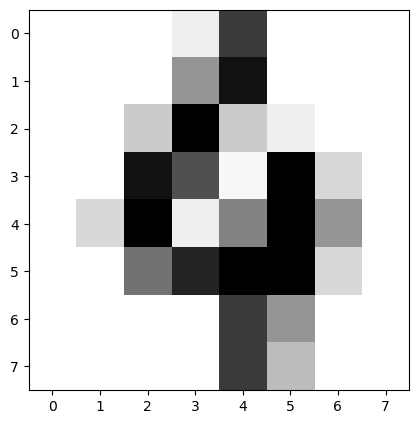

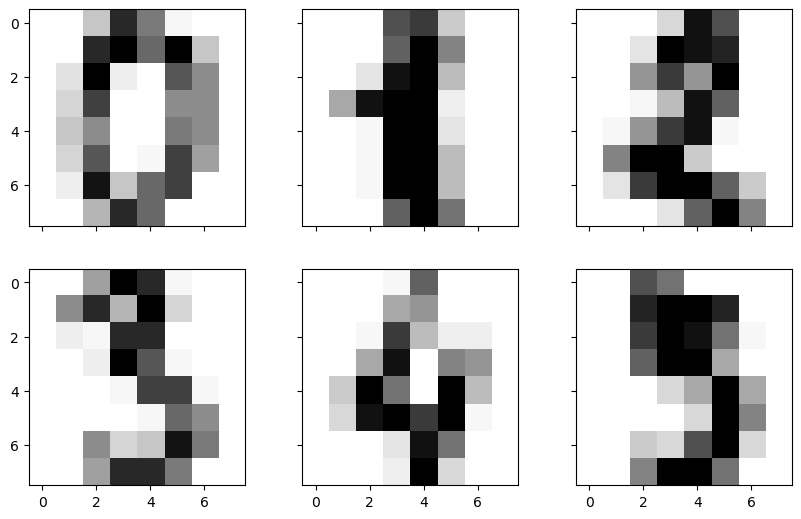

In [ ]:
foigure = plt.figure(figsize=(8, 8/1.618))

# Plot just one image.
image = 100
plt.imshow(X[image].reshape(8, 8), cmap="Greys")
print(f"y interpreted value: {y[image]}")

# Plot a few images.
# All pots share same axis. Means plots do not have independent axes.
fig, axes = plt.subplots(
    nrows=2, ncols=3, sharex=True, sharey=True, 
    figsize=(10, 10 / 1.618)
)

# I'm walking through these in a 'diagnolized' sense.
for image in range(2 * 3):
    row = image // 3
    col = image % 3
    axes[row, col].imshow(X[image].reshape(8,8), cmap="Greys")